# Manifold Learning

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high.

Though we have both supervised and unsupervised linear dimensionality reduction frameworks such as PCA, Independent Component Analysis, Linear Discriminant Analysis, etc. Some non-linear features will be ignored. Manifold is a try to catch the non-linear feature in high dimension data.

Typical manifold learning is unsupervised since the algorithm is learning the structure of the data instead of the pre-defined class.

---

## Isomap

One of the earliest approaches to manifold learning is the Isomap algorithm, short for Isometric Mapping. Isomap can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA. Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points.

---

## Locally Linear Embedding

Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

One well-known issue with LLE is the regularization problem. When the number of neighbors is greater than the number of input dimensions, the matrix defining each local neighborhood is rank-deficient. To address this, standard LLE applies an arbitrary regularization parameter r, which is chosen relative to the trace of the local weight matrix. Though it can be shown formally that as $r
\rightarrow 0$, the solution converges to the desired embedding, there is no guarantee that the optimal solution will be found for $r > 0$. This problem manifests itself in embeddings which distort the underlying geometry of the manifold.

---

## Modified Locally Linear Embedding

Modified Locally Linear Embedding solves the regularization problem by using multiple weight vectors in each neighborhood. MLLE can be performed with function locally_linear_embedding or its object-oriented counterpart LocallyLinearEmbedding, with the keyword method = 'modified'. It requires n_neighbors > n_components.

---

## Hessian Eigenmapping

Hessian Eigenmapping (also known as Hessian-based LLE: HLLE) is another method of solving the regularization problem of LLE. It revolves around a hessian-based quadratic form at each neighborhood which is used to recover the locally linear structure. Though other implementations note its poor scaling with data size, sklearn implements some algorithmic improvements which make its cost comparable to that of other LLE variants for small output dimension. HLLE can be performed with function locally_linear_embedding or its object-oriented counterpart LocallyLinearEmbedding, with the keyword method = 'hessian'. It requires n_neighbors > n_components * (n_components + 3) / 2.

---

## Spectral Embedding

Spectral Embedding is an approach to calculating a non-linear embedding. Scikit-learn implements Laplacian Eigenmaps, which finds a low dimensional representation of the data using a spectral decomposition of the graph Laplacian. The graph generated can be considered as a discrete approximation of the low dimensional manifold in the high dimensional space. Minimization of a cost function based on the graph ensures that points close to each other on the manifold are mapped close to each other in the low dimensional space, preserving local distances. Spectral embedding can be performed with the function spectral_embedding or its object-oriented counterpart SpectralEmbedding.

---

## Local Tangent Space Alignment

Though not technically a variant of LLE, Local tangent space alignment (LTSA) is algorithmically similar enough to LLE that it can be put in this category. Rather than focusing on preserving neighborhood distances as in LLE, LTSA seeks to characterize the local geometry at each neighborhood via its tangent space, and performs a global optimization to align these local tangent spaces to learn the embedding. LTSA can be performed with function locally_linear_embedding or its object-oriented counterpart LocallyLinearEmbedding, with the keyword method = 'ltsa'.

---

## Multi-dimensional Scaling (MDS)

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.

In general, MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as distances in a geometric spaces. The data can be ratings of similarity between objects, interaction frequencies of molecules, or trade indices between countries.

There exists two types of MDS algorithm: metric and non metric. In scikit-learn, the class MDS implements both. In Metric MDS, the input similarity matrix arises from a metric (and thus respects the triangular inequality), the distances between output two points are then set to be as close as possible to the similarity or dissimilarity data. In the non-metric version, the algorithms will try to preserve the order of the distances, and hence seek for a monotonic relationship between the distances in the embedded space and the similarities/dissimilarities.

---

## t-distributed Stochastic Neighbor Embedding (t-SNE)

Mainly for high dimension data

- Advantage
  - Revealing the structure at many scales on a single map
  - Revealing data that lie in multiple, different, manifolds or clusters
  - Reducing the tendency to crowd points together at the center
- Disadvantage
  - t-SNE is computationally expensive, and can take several hours on million-sample datasets where PCA will finish in seconds or minutes
  - The Barnes-Hut t-SNE method is limited to two or three dimensional embeddings.
  - The algorithm is stochastic and multiple restarts with different seeds can yield different embeddings. However, it is perfectly legitimate to pick the embedding with the least error.
  - Global structure is not explicitly preserved. This problem is mitigated by initializing points with PCA (using init='pca').

---

## Optimizing t-SNE

See user guide

---

## Barnes-Hut t-SNE

- The Barnes-Hut implementation only works when the target dimensionality is 3 or less. The 2D case is typical when building visualizations.
- Barnes-Hut only works with dense input data. Sparse data matrices can only be embedded with the exact method or can be approximated by a dense low rank projection for instance using TruncatedSVD
- Barnes-Hut is an approximation of the exact method. The approximation is parameterized with the angle parameter, therefore the angle parameter is unused when method=”exact”
- Barnes-Hut is significantly more scalable. Barnes-Hut can be used to embed hundred of thousands of data points while the exact method can handle thousands of samples before becoming computationally intractable

For visualization purpose (which is the main use case of t-SNE), using the Barnes-Hut method is strongly recommended. The exact t-SNE method is useful for checking the theoretically properties of the embedding possibly in higher dimensional space but limit to small datasets due to computational constraints.

Also note that the digits labels roughly match the natural grouping found by t-SNE while the linear 2D projection of the PCA model yields a representation where label regions largely overlap. This is a strong clue that this data can be well separated by non linear methods that focus on the local structure (e.g. an SVM with a Gaussian RBF kernel). However, failing to visualize well separated homogeneously labeled groups with t-SNE in 2D does not necessarily imply that the data cannot be correctly classified by a supervised model. It might be the case that 2 dimensions are not high enough to accurately represent the internal structure of the data.

## Comparison of Manifold Learning methods

In [8]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker

from sklearn import datasets, manifold

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

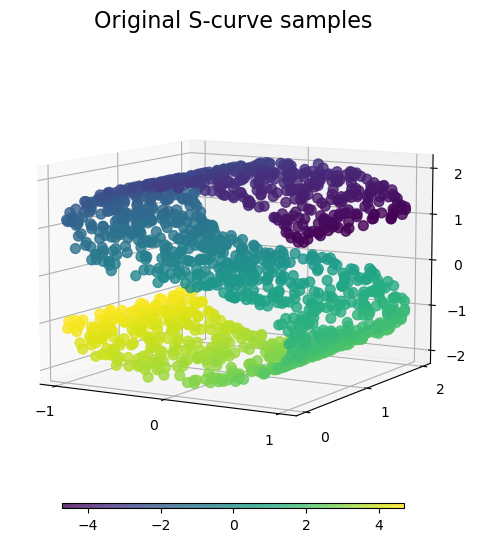

In [9]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")

In [10]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

In [11]:
params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)

lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(S_points)

lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
S_hessian = lle_hessian.fit_transform(S_points)

lle_mod = manifold.LocallyLinearEmbedding(method="modified", **params)
S_mod = lle_mod.fit_transform(S_points)

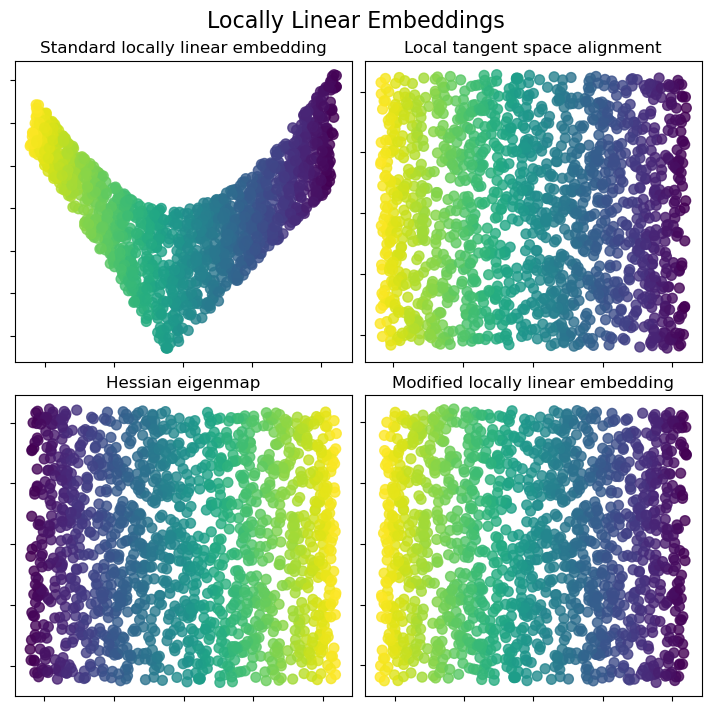

In [12]:
fig, axs = plt.subplots(
    nrows=2, ncols=2, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", S_standard),
    ("Local tangent space alignment", S_ltsa),
    ("Hessian eigenmap", S_hessian),
    ("Modified locally linear embedding", S_mod),
]
for ax, method in zip(axs.flat, lle_methods):
    name, points = method
    add_2d_scatter(ax, points, S_color, name)

plt.show()

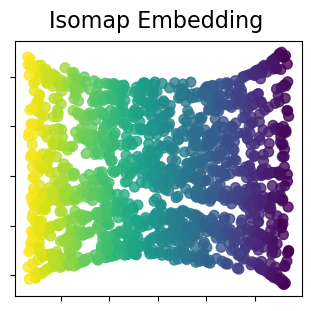

In [13]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(S_points)

plot_2d(S_isomap, S_color, "Isomap Embedding")

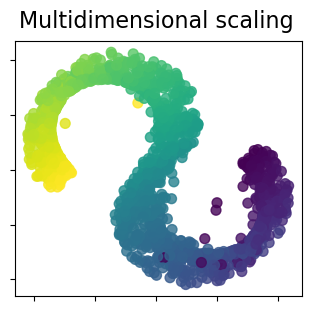

In [14]:
md_scaling = manifold.MDS(
    n_components=n_components,
    max_iter=50,
    n_init=4,
    random_state=0,
    normalized_stress=False,
)
S_scaling = md_scaling.fit_transform(S_points)

plot_2d(S_scaling, S_color, "Multidimensional scaling")

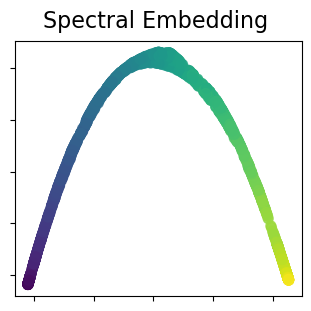

In [15]:
spectral = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
S_spectral = spectral.fit_transform(S_points)

plot_2d(S_spectral, S_color, "Spectral Embedding")

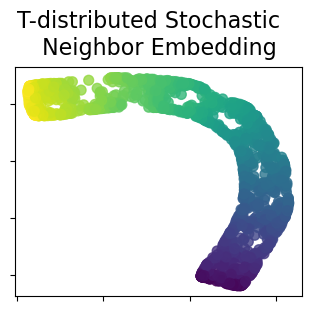

In [16]:
t_sne = manifold.TSNE(
    n_components=n_components,
    perplexity=30,
    init="random",
    n_iter=250,
    random_state=0,
)
S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")

## Manifold learning on handwritten digits: Locally Linear Embedding, Isomap…

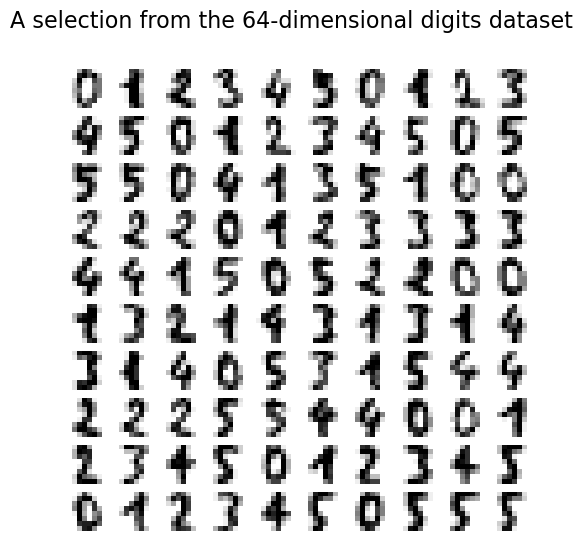

In [17]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [19]:
import numpy as np
from matplotlib import offsetbox

from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [20]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    MDS,
    TSNE,
    Isomap,
    LocallyLinearEmbedding,
    SpectralEmbedding,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(
        n_components=2, n_init=1, max_iter=120, n_jobs=2, normalized_stress="auto"
    ),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [21]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...
Computing NCA embedding...


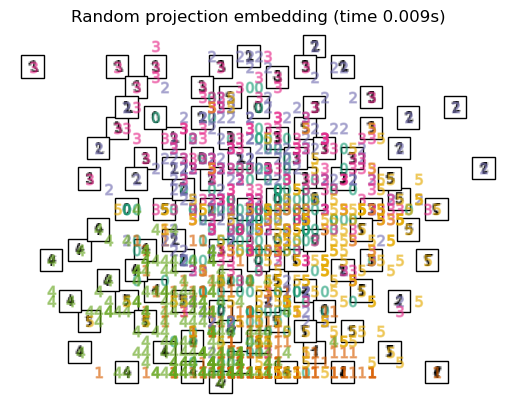

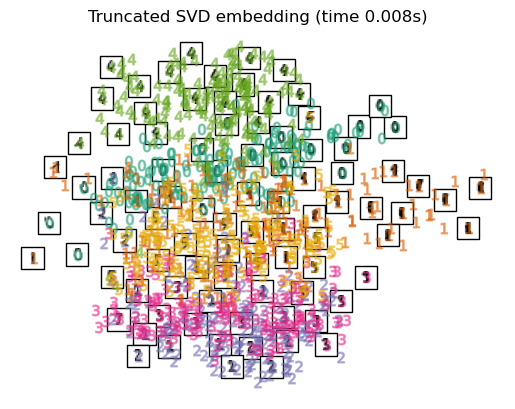

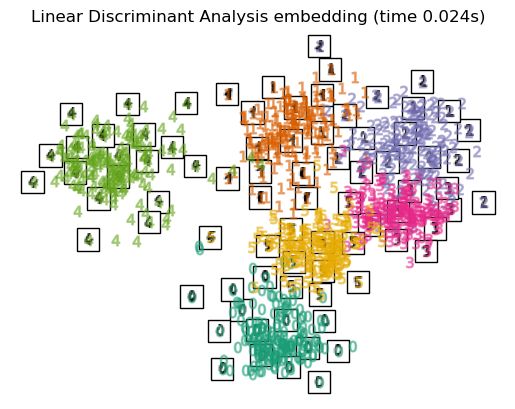

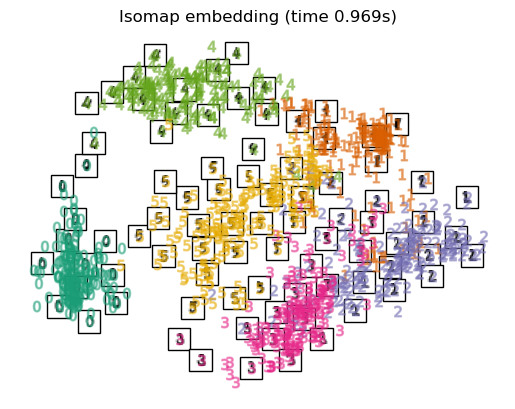

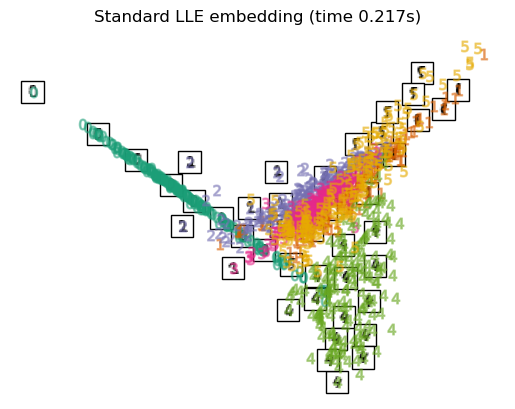

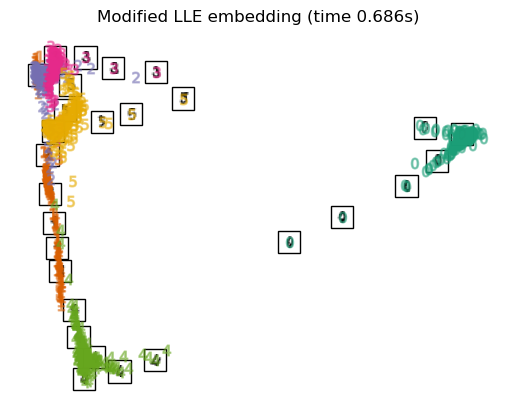

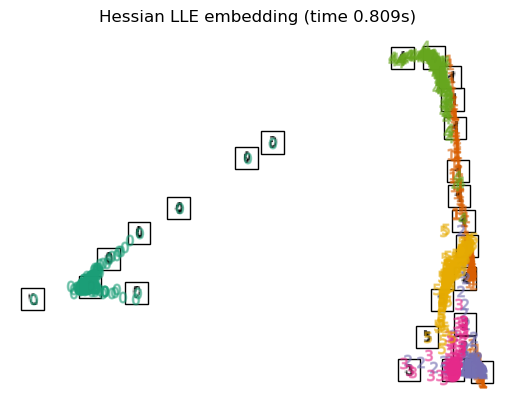

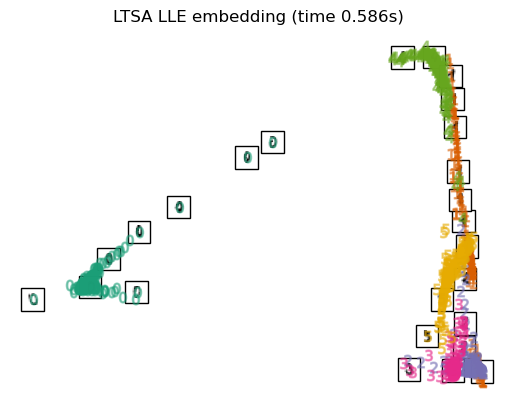

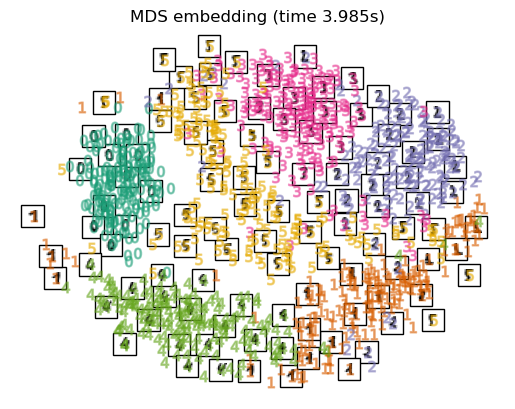

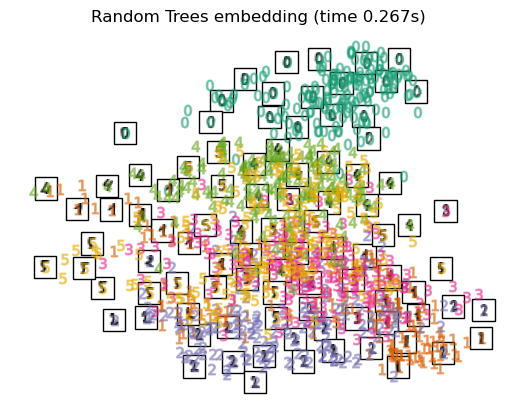

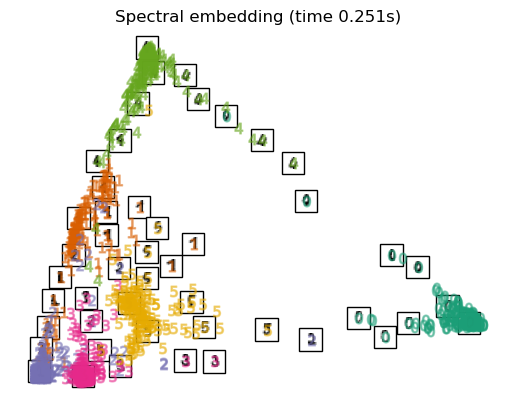

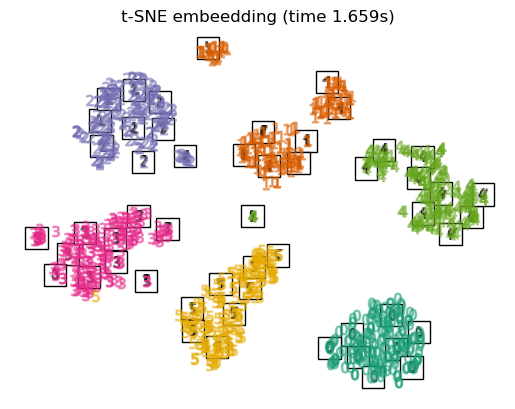

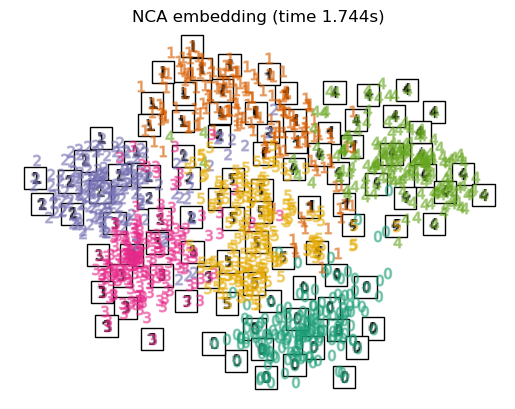

In [22]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()